#### Dans cette etape nous avons commencer par l'importation de tous les packages que nous avons besoin

##### installation des packages

In [1]:
#pip install -U pandasql
#pip install plotly==4.14.3
#pip install dash
#sous anaconda prompt 

##### importation des packages

In [2]:
import os # importing the operating system 
import pandas # la manipulation et l'analyse des données
import numpy as np #manipuler des matrices ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
import seaborn as sns  #librairie de  visualisation  basé sur matplotlib
import matplotlib.pyplot as plt #biblio de visualisation
%matplotlib inline #configure la bibliothèque que nous utilisons pour dessiner le graphique.

UsageError: unrecognized arguments: #configure la bibliothèque que nous utilisons pour dessiner le graphique.


In [5]:
import pandasql as pdsql #Exécuter une requête SQL sur un ensemble de données pandas
from pandasql import sqldf 

ModuleNotFoundError: No module named 'pandasql'

In [6]:
from datetime import datetime, timedelta,date
from sklearn.metrics import classification_report,confusion_matrix #Scikit-learn est une bibliothèque 
                                                                   #libre Python destinée à l'apprentissage automatique
from __future__ import division
from sklearn.cluster import KMeans

In [7]:
#from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.model_selection import  train_test_split

##### importation des données

In [8]:
Table_Recharge=pandas.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\RECHARGE_LTV.txt",sep=";")
TABLE_RECH_M=sqldf("select code_contrat, ROUND(SUM(MNT_RECHARGE)/6,2) as MNT_RECH_M,  SUM(NB_RECHARGE) as NB_RECH_TOT , ROUND(SUM(NB_RECHARGE)/6,2) as NB_RECH_M  from Table_Recharge group by code_contrat")
#ROUND(SUM(NB_RECHARGE)/6,2) 6 : pour 6mois / 2: 2nb apres virgule

NameError: name 'sqldf' is not defined

In [ ]:
Table_Recharge

In [7]:
TABLE_RECH_M

,code_contrat,MNT_RECH_M,NB_RECH_TOT,NB_RECH_M
0,1200000134_SB,7.50,41.0,6.83
1,120000027_SB,5.00,18.0,3.00
2,1200001912_SB,13.50,17.0,2.83
3,120000256_SB,1.00,6.0,1.00
4,1200002653_SB,7.00,30.0,5.00
...,...,...,...,...
199995,129999696_SB,2.33,6.0,1.00
199996,1299997543_SB,12.67,28.0,4.67
199997,129999776_SB,0.83,1.0,0.17
199998,1299997893_SB,NaN,NaN,NaN


In [8]:
Table_USAGE_SORTANT=pd.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\USAGE_SORTANT_LTV.txt",sep=";")
TABLE_USAGE_SORTANT_LTV_M=sqldf("select code_contrat,ROUND(SUM(DUREE_APPEL_OUT)/6,2) as DUREE_APPEL_OUT_M,SUM(NB_APPEL_OUT) as NB_APPEL_OUT_TOT, ROUND(SUM(REVENU_CDR)/6,2) as REVENU_CDR_M,SUM(NB_SMS_OUT) as NB_SMS_TOT from Table_USAGE_SORTANT group by code_contrat")

In [9]:
Table_USAGE_SORTANT

,code_contrat,DUREE_APPEL_OUT,NB_APPEL_OUT,NB_SMS_OUT,DUREE_APPEL_OUT_G,REVENU_CDR,MOIS
0,1200000134_SB,1.18,12.0,1.0,1.15,0.445,11.0
1,1200000134_SB,6.57,10.0,NaN,6.40,0.385,7.0
2,1200000134_SB,11.45,15.0,NaN,11.45,0.000,10.0
3,1200000134_SB,16.22,11.0,3.0,15.42,0.820,9.0
4,1200000134_SB,28.52,47.0,1.0,27.97,0.820,8.0
...,...,...,...,...,...,...,...
1044927,129999776_SB,287.72,90.0,22.0,0.00,12.635,8.0
1044928,129999776_SB,295.38,160.0,NaN,0.73,13.265,10.0
1044929,129999776_SB,348.05,104.0,5.0,0.00,19.995,9.0
1044930,1299997893_SB,NaN,NaN,NaN,0.00,0.000,NaN


In [10]:
TABLE_USAGE_SORTANT_LTV_M

,code_contrat,DUREE_APPEL_OUT_M,NB_APPEL_OUT_TOT,REVENU_CDR_M,NB_SMS_TOT
0,1200000134_SB,20.20,160.0,0.41,5.0
1,120000027_SB,78.59,380.0,0.21,2.0
2,1200001912_SB,441.23,2443.0,3.67,75.0
3,120000256_SB,3.36,30.0,1.02,1.0
4,1200002653_SB,123.60,585.0,0.20,58.0
...,...,...,...,...,...
199995,129999696_SB,35.81,72.0,2.34,4.0
199996,1299997543_SB,155.45,806.0,11.72,NaN
199997,129999776_SB,184.10,447.0,8.93,27.0
199998,1299997893_SB,NaN,NaN,0.00,NaN


In [11]:
Table_USAGE_ENTRANT=pd.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\USAGE_ENTRANT_LTV.txt",sep=";")
TABLE_USAGE_ENTRANT_LTV_M=sqldf("select code_contrat, ROUND(SUM(DUREE_APPEL_IN)/6,2) as DUREE_APPEL_IN_M from Table_USAGE_ENTRANT group by code_contrat")

In [12]:
Table_USAGE_ENTRANT

,code_contrat,DUREE_APPEL_IN,MOIS
0,1200000134_SB,2.53,8.0
1,1200000134_SB,2.77,9.0
2,1200000134_SB,3.93,7.0
3,1200000134_SB,5.82,11.0
4,1200000134_SB,11.83,10.0
...,...,...,...
1098739,129999776_SB,56.33,9.0
1098740,129999776_SB,76.10,10.0
1098741,1299997893_SB,NaN,7.0
1098742,1299999514_SB,NaN,7.0


In [13]:
TABLE_USAGE_ENTRANT_LTV_M

,code_contrat,DUREE_APPEL_IN_M
0,1200000134_SB,7.19
1,120000027_SB,25.29
2,1200001912_SB,203.48
3,120000256_SB,43.94
4,1200002653_SB,389.99
...,...,...
199995,129999696_SB,12.32
199996,1299997543_SB,103.22
199997,129999776_SB,38.45
199998,1299997893_SB,NaN


In [14]:
Table_USSD=pd.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\USG_USSD_LTV.txt",sep=";")
TABLE_USSD_LTV_M=sqldf("select code_contrat, ROUND(SUM(MNT_FORFAIT)/6,2) as MNT_FORFAIT_M ,SUM(NB_FORFAIT) as NB_FORFAIT_TOT, ROUND(SUM(MNT_FORFAIT_DATA)/6,2) as MNT_FORFAIT_DATA_M ,SUM(NB_FORFAIT_DATA) as NB_FORFAIT_DATA_TOT,ROUND(SUM(MNT_FORFAIT_VOIX)/6,2) as MNT_FORFAIT_DATA_VOIX , SUM(NB_FORFAIT_VOIX) as NB_FORFAIT_VOIX_TOT  from Table_USSD group by code_contrat")

In [15]:
Table_USSD

,code_contrat,MNT_FORFAIT,NB_FORFAIT,MNT_FORFAIT_DATA,NB_FORFAIT_DATA,MNT_FORFAIT_VOIX,NB_FORFAIT_VOIX,MOIS
0,1200000134_SB,2.00,8.0,2.00,8.0,NaN,NaN,9.0
1,1200000134_SB,5.50,22.0,5.50,22.0,NaN,NaN,10.0
2,1200000134_SB,5.90,8.0,5.90,8.0,NaN,NaN,11.0
3,1200000134_SB,6.75,27.0,6.75,27.0,NaN,NaN,8.0
4,1200000134_SB,17.20,18.0,17.20,18.0,NaN,NaN,12.0
...,...,...,...,...,...,...,...,...
533116,129999776_SB,NaN,NaN,NaN,NaN,NaN,NaN,10.0
533117,129999776_SB,0.90,1.0,0.90,1.0,NaN,NaN,7.0
533118,129999776_SB,0.90,1.0,0.90,1.0,NaN,NaN,8.0
533119,1299997893_SB,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
TABLE_USSD_LTV_M

,code_contrat,MNT_FORFAIT_M,NB_FORFAIT_TOT,MNT_FORFAIT_DATA_M,NB_FORFAIT_DATA_TOT,MNT_FORFAIT_DATA_VOIX,NB_FORFAIT_VOIX_TOT
0,1200000134_SB,6.23,83.0,6.23,83.0,NaN,NaN
1,120000027_SB,0.38,4.0,0.38,4.0,NaN,NaN
2,1200001912_SB,10.17,122.0,NaN,NaN,10.17,122.0
3,120000256_SB,NaN,NaN,NaN,NaN,NaN,NaN
4,1200002653_SB,5.39,34.0,5.08,32.0,0.32,2.0
...,...,...,...,...,...,...,...
199995,129999696_SB,NaN,NaN,NaN,NaN,NaN,NaN
199996,1299997543_SB,NaN,NaN,NaN,NaN,NaN,NaN
199997,129999776_SB,0.30,2.0,0.30,2.0,NaN,NaN
199998,1299997893_SB,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
Table_usg_data=pd.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\USAGE_DATA_LTV.txt",sep=";")
TABLE_USAGE_DATA_LTV_M=sqldf("select code_contrat, SUM(NB_CONNEXION) as NB_CONNEXION_TOT, ROUND(SUM(VOL_SESSION)/6,2) as VOL_SESSION_M   from Table_usg_data group by code_contrat")

In [18]:
Table_usg_data

,code_contrat,NB_CONNEXION,VOL_SESSION,MOIS
0,1200000134_SB,289.0,131.06,7.0
1,1200000134_SB,1578.0,916.44,10.0
2,1200000134_SB,1733.0,894.31,11.0
3,1200000134_SB,1966.0,294.10,9.0
4,1200000134_SB,4558.0,3449.37,12.0
...,...,...,...,...
594751,129999696_SB,NaN,NaN,NaN
594752,1299997543_SB,NaN,NaN,NaN
594753,129999776_SB,NaN,NaN,NaN
594754,1299997893_SB,541.0,1.06,7.0


In [19]:
TABLE_USAGE_DATA_LTV_M

,code_contrat,NB_CONNEXION_TOT,VOL_SESSION_M
0,1200000134_SB,15801.0,1098.24
1,120000027_SB,46685.0,97.36
2,1200001912_SB,329.0,0.63
3,120000256_SB,60.0,0.02
4,1200002653_SB,19843.0,1045.15
...,...,...,...
199995,129999696_SB,NaN,NaN
199996,1299997543_SB,NaN,NaN
199997,129999776_SB,NaN,NaN
199998,1299997893_SB,541.0,0.18


In [20]:
TABLE_DIM_LTV_1 = pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\TABLE_DIM_LTV_1.csv',sep=";")
TABLE_DIM_LTV_2 = pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\TABLE_DIM_LTV_2.csv',sep=";")
TABLE_DIM_LTV_3 = pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\TABLE_DIM_LTV_3.csv',sep=";")
vertical_DIM_LTV = pd.concat([TABLE_DIM_LTV_1,TABLE_DIM_LTV_2,TABLE_DIM_LTV_3], axis=0)

In [21]:
vertical_DIM_LTV

,code_contrat,DATE_ACTIVATION,OFFRE,REGION
0,1233500001_SB,10APR11:14:47:24,PRE - 900 bonus,Tunis
1,1286800001_SB,06APR11:16:16:11,PRE - 900 bonus,Gafsa
2,1250010001_SB,29AUG11:10:03:44,PRE - Doublé,Kebili
3,120120001_SB,19MAY09:00:00:00,PRE - Double Reinstal,Medenine
4,1289220001_SB,18APR11:17:30:12,PRE - 900 bonus,Sidi Bouzid
...,...,...,...,...
66661,125535999_SB,02SEP11:10:54:49,PRE - TT 1500%,Medenine
66662,124508999_SB,24JUN11:09:00:46,PRE - TT 1500%,Medenine
66663,123448999_SB,23APR11:10:24:57,PRE - AHLA,Kef
66664,121049999_SB,15JUN11:16:01:22,PRE - offre 40,Tunis


In [22]:
TABLE_FIRST_LAST_USAGE_LTV_1 = pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\FIRST_LAST_USAGE_LTV_1.csv',sep=";")
TABLE_FIRST_LAST_USAGE_LTV_2 = pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\FIRST_LAST_USAGE_LTV_2.csv',sep=";")
TABLE_FIRST_LAST_USAGE_LTV_3= pd.read_csv (r'C:\Users\Aya Chammam\Desktop\oldPc\bureau\CLTVCSV\FIRST_LAST_USAGE_LTV_3.csv',sep=";")
vertical_FIRST_LAST_USAGE_LTV = pd.concat([TABLE_FIRST_LAST_USAGE_LTV_1,TABLE_FIRST_LAST_USAGE_LTV_2,TABLE_FIRST_LAST_USAGE_LTV_3], axis=0)

In [23]:
vertical_FIRST_LAST_USAGE_LTV 

,code_contrat,LAST_DATE_USAGE,FIRST_DATE_USAGE
0,1233500001_SB,31DEC19:00:00:00,01JUL19:00:00:00
1,1286800001_SB,31DEC19:00:00:00,01JUL19:00:00:00
2,1250010001_SB,02DEC19:00:00:00,03JUL19:00:00:00
3,120120001_SB,30DEC19:00:00:00,01JUL19:00:00:00
4,1289220001_SB,31DEC19:00:00:00,01JUL19:00:00:00
...,...,...,...
66661,125535999_SB,30DEC19:00:00:00,02AUG19:00:00:00
66662,124508999_SB,31DEC19:00:00:00,01JUL19:00:00:00
66663,123448999_SB,28DEC19:00:00:00,03JUL19:00:00:00
66664,121049999_SB,04NOV19:00:00:00,02JUL19:00:00:00


##### jointure des tables 

In [24]:
df1= vertical_DIM_LTV.merge(vertical_FIRST_LAST_USAGE_LTV, on='code_contrat', how='left')

In [25]:
df2=df1.merge(TABLE_RECH_M, on='code_contrat', how='left')

In [26]:
df3= df2.merge(TABLE_USAGE_SORTANT_LTV_M, on='code_contrat', how='left')

In [27]:
df4= df3.merge(TABLE_USAGE_ENTRANT_LTV_M, on='code_contrat', how='left')

In [28]:
df5= df4.merge(TABLE_USAGE_DATA_LTV_M, on='code_contrat', how='left')

In [29]:
dffinal= df5.merge(TABLE_USSD_LTV_M, on='code_contrat', how='left')
#dffinal.to_csv(r'dataff.csv', index = False)

In [30]:
dffinal

,code_contrat,DATE_ACTIVATION,OFFRE,REGION,LAST_DATE_USAGE,FIRST_DATE_USAGE,MNT_RECH_M,NB_RECH_TOT,NB_RECH_M,DUREE_APPEL_OUT_M,...,NB_SMS_TOT,DUREE_APPEL_IN_M,NB_CONNEXION_TOT,VOL_SESSION_M,MNT_FORFAIT_M,NB_FORFAIT_TOT,MNT_FORFAIT_DATA_M,NB_FORFAIT_DATA_TOT,MNT_FORFAIT_DATA_VOIX,NB_FORFAIT_VOIX_TOT
0,1233500001_SB,10APR11:14:47:24,PRE - 900 bonus,Tunis,31DEC19:00:00:00,01JUL19:00:00:00,11.33,44.0,7.33,132.23,...,5.0,130.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1286800001_SB,06APR11:16:16:11,PRE - 900 bonus,Gafsa,31DEC19:00:00:00,01JUL19:00:00:00,11.00,14.0,2.33,126.72,...,47.0,52.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1250010001_SB,29AUG11:10:03:44,PRE - Doublé,Kebili,02DEC19:00:00:00,03JUL19:00:00:00,1.83,11.0,1.83,9.89,...,NaN,34.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,120120001_SB,19MAY09:00:00:00,PRE - Double Reinstal,Medenine,30DEC19:00:00:00,01JUL19:00:00:00,1.67,2.0,0.33,12.46,...,NaN,50.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1289220001_SB,18APR11:17:30:12,PRE - 900 bonus,Sidi Bouzid,31DEC19:00:00:00,01JUL19:00:00:00,7.00,18.0,3.00,92.69,...,NaN,80.90,NaN,NaN,1.95,13.0,1.95,13.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,125535999_SB,02SEP11:10:54:49,PRE - TT 1500%,Medenine,30DEC19:00:00:00,02AUG19:00:00:00,0.67,4.0,0.67,7.11,...,6.0,1.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199996,124508999_SB,24JUN11:09:00:46,PRE - TT 1500%,Medenine,31DEC19:00:00:00,01JUL19:00:00:00,5.67,22.0,3.67,54.18,...,10.0,56.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
199997,123448999_SB,23APR11:10:24:57,PRE - AHLA,Kef,28DEC19:00:00:00,03JUL19:00:00:00,4.50,23.0,3.83,50.93,...,1.0,1110.34,5051.0,2.19,1.43,9.0,NaN,NaN,1.43,9.0
199998,121049999_SB,15JUN11:16:01:22,PRE - offre 40,Tunis,04NOV19:00:00:00,02JUL19:00:00:00,0.33,2.0,0.33,3.00,...,5.0,11.71,35450.0,103.38,0.62,7.0,0.62,7.0,NaN,NaN


##### nettoyage des données

Tous d'abord nous avons commencer par la suppression des doublons 

In [31]:
DF=dffinal.drop_duplicates()

puis nous avons imputer les valeurs null par 0 car les données manquantes doivent etre  traiter comme des valeurs mesurées. Enfin, la solution idéale serait de corriger les erreurs responsables des données manquantes ou de compléter la collecte de données



In [32]:
DF['NB_CONNEXION_TOT']


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
199995        NaN
199996        NaN
199997     5051.0
199998    35450.0
199999        NaN
Name: NB_CONNEXION_TOT, Length: 200000, dtype: float64

In [33]:
DF['NB_RECH_TOT'].fillna(0, inplace=True) #inplace = true 
DF['NB_RECH_M'].fillna(0, inplace=True)
DF['DUREE_APPEL_OUT_M'].fillna(0, inplace=True)
DF['NB_APPEL_OUT_TOT'].fillna(0, inplace=True)
DF['DUREE_APPEL_IN_M'].fillna(0, inplace=True)
DF['NB_CONNEXION_TOT'].fillna(0, inplace=True)
DF['VOL_SESSION_M'].fillna(0, inplace=True)
DF['MNT_FORFAIT_M'].fillna(0, inplace=True)
DF['NB_FORFAIT_TOT'].fillna(0, inplace=True)
DF['MNT_FORFAIT_DATA_M'].fillna(0, inplace=True)
DF['MNT_FORFAIT_DATA_M'].fillna(0, inplace=True)
DF['NB_FORFAIT_DATA_TOT'].fillna(0, inplace=True)
DF['MNT_FORFAIT_DATA_VOIX'].fillna(0, inplace=True)
DF['NB_FORFAIT_VOIX_TOT'].fillna(0, inplace=True)
DF['NB_SMS_TOT'].fillna(0, inplace=True)
#inplace = True , les données sont modifiées sur place
#inplace = False , qui est la valeur par défaut, l'opération est effectuée et renvoie une copie de l'objet. donc on doit
#ensuite l'enregistrer dans quelque chose.

In [34]:
DF['NB_CONNEXION_TOT']

0             0.0
1             0.0
2             0.0
3             0.0
4             0.0
           ...   
199995        0.0
199996        0.0
199997     5051.0
199998    35450.0
199999        0.0
Name: NB_CONNEXION_TOT, Length: 200000, dtype: float64

Dans cette etapes on doit changer la forme de date afin de calculer le feature RFM

In [35]:
# %d : Jour du mois sur deux chiffres.
# %b: Nom du mois sous forme 'feb,dec'
# %y: année sur 2 chiffres

#%H : Heure à deux chiffres de 00 à 23.
#%M : Minutes sur deux chiffres.
#%S : Secondes sur deux chiffres.
DF['FIRST_DATE_USAGE']

0         01JUL19:00:00:00
1         01JUL19:00:00:00
2         03JUL19:00:00:00
3         01JUL19:00:00:00
4         01JUL19:00:00:00
                ...       
199995    02AUG19:00:00:00
199996    01JUL19:00:00:00
199997    03JUL19:00:00:00
199998    02JUL19:00:00:00
199999    02JUL19:00:00:00
Name: FIRST_DATE_USAGE, Length: 200000, dtype: object

In [36]:
DF['FIRST_DATE_USAGE']=pd.to_datetime(DF['FIRST_DATE_USAGE'],format='%d%b%y:%H:%M:%S') #changer le type de texte => date
DF['LAST_DATE_USAGE']=pd.to_datetime(DF['FIRST_DATE_USAGE'],format='%d%b%y:%H:%M:%S')
DF.insert(1, 'DERNIERE_TRANSACTION', '2019-12-31')
DF['LAST_DATE_USAGE']-DF['FIRST_DATE_USAGE'] #pour tester si le type a changé 


0        0 days
1        0 days
2        0 days
3        0 days
4        0 days
          ...  
199995   0 days
199996   0 days
199997   0 days
199998   0 days
199999   0 days
Length: 200000, dtype: timedelta64[ns]

In [37]:
DF['FIRST_DATE_USAGE']

0        2019-07-01
1        2019-07-01
2        2019-07-03
3        2019-07-01
4        2019-07-01
            ...    
199995   2019-08-02
199996   2019-07-01
199997   2019-07-03
199998   2019-07-02
199999   2019-07-02
Name: FIRST_DATE_USAGE, Length: 200000, dtype: datetime64[ns]

nous devons calculer la derniere transaction afin de calculer la recency 

In [38]:
DF.info()

#insertion a la position 1 la derniere transaction 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   code_contrat           200000 non-null  object        
 1   DERNIERE_TRANSACTION   200000 non-null  object        
 2   DATE_ACTIVATION        199998 non-null  object        
 3   OFFRE                  200000 non-null  object        
 4   REGION                 200000 non-null  object        
 5   LAST_DATE_USAGE        196180 non-null  datetime64[ns]
 6   FIRST_DATE_USAGE       196180 non-null  datetime64[ns]
 7   MNT_RECH_M             192325 non-null  float64       
 8   NB_RECH_TOT            200000 non-null  float64       
 9   NB_RECH_M              200000 non-null  float64       
 10  DUREE_APPEL_OUT_M      200000 non-null  float64       
 11  NB_APPEL_OUT_TOT       200000 non-null  float64       
 12  REVENU_CDR_M           200000 non-null  floa

dans cette etape on va changer le format des variables de type texte en date 

In [39]:
DF.DERNIERE_TRANSACTION=pd.to_datetime(DF.DERNIERE_TRANSACTION)
DF.LAST_DATE_USAGE  =pd.to_datetime(DF.LAST_DATE_USAGE)
DF.FIRST_DATE_USAGE=pd.to_datetime(DF.FIRST_DATE_USAGE)

avant de commencer on doit expliquer la notion marketing rfm : une méthode de segmentation souvent utilisée en marketing direct.
la recence : date du dernier achat / la frequence : frequence des achats sur la période étudiée /
la valeur : valeur des achats réalisés par le client sur la période étudiée.

##### Recence


In [40]:
DF['DIFFDATE']=(DF['DERNIERE_TRANSACTION']-DF['LAST_DATE_USAGE']).dt.days
DF['DIFFDATE']

0         183.0
1         183.0
2         181.0
3         183.0
4         183.0
          ...  
199995    151.0
199996    183.0
199997    181.0
199998    182.0
199999    182.0
Name: DIFFDATE, Length: 200000, dtype: float64

In [41]:
DF.DIFFDATE.describe()


count    196180.000000
mean        177.724182
std          16.667596
min           0.000000
25%         181.000000
50%         183.000000
75%         183.000000
max         183.000000
Name: DIFFDATE, dtype: float64

##### Frequence


In [42]:
startdt=pd.to_datetime('2019-07-01')
enddt = pd.to_datetime('2019-12-31')
periode_analyse=len(pd.date_range(start=startdt,end=enddt,freq='D'))
periode_analyse

184

In [43]:
DF['FREQUENCY']=periode_analyse/(DF['NB_APPEL_OUT_TOT']+DF['NB_SMS_TOT']+DF['NB_CONNEXION_TOT'])
DF['FREQUENCY'] 

0         0.189495
1         0.219570
2         4.181818
3         2.920635
4         0.258065
            ...   
199995    4.972973
199996    0.470588
199997    0.035141
199998    0.005185
199999    0.575000
Name: FREQUENCY, Length: 200000, dtype: float64

##### Monetaire


In [44]:
tablefinal =sqldf(" SELECT * , REVENU_CDR_M+MNT_FORFAIT_M as ARPU from DF ")
#arpu = monetaire 

##### Ancienneté


ancienneté c' est l historique de client  

In [45]:
#CHANGER FORME DATE D'activation
DF['DATE_ACTIVATION']=pd.to_datetime(DF['DATE_ACTIVATION'],format='%d%b%y:%H:%M:%S')
DF['DATE_ACTIVATION']

0        2011-04-10 14:47:24
1        2011-04-06 16:16:11
2        2011-08-29 10:03:44
3        2009-05-19 00:00:00
4        2011-04-18 17:30:12
                 ...        
199995   2011-09-02 10:54:49
199996   2011-06-24 09:00:46
199997   2011-04-23 10:24:57
199998   2011-06-15 16:01:22
199999   2011-05-23 16:36:32
Name: DATE_ACTIVATION, Length: 200000, dtype: datetime64[ns]

In [46]:
DF['ANCIENNETE']=(DF['DERNIERE_TRANSACTION']-DF['DATE_ACTIVATION']).dt.days
DF['ANCIENNETE']

0         3186.0
1         3190.0
2         3045.0
3         3878.0
4         3178.0
           ...  
199995    3041.0
199996    3111.0
199997    3173.0
199998    3120.0
199999    3143.0
Name: ANCIENNETE, Length: 200000, dtype: float64

In [47]:
DF

,code_contrat,DERNIERE_TRANSACTION,DATE_ACTIVATION,OFFRE,REGION,LAST_DATE_USAGE,FIRST_DATE_USAGE,MNT_RECH_M,NB_RECH_TOT,NB_RECH_M,...,VOL_SESSION_M,MNT_FORFAIT_M,NB_FORFAIT_TOT,MNT_FORFAIT_DATA_M,NB_FORFAIT_DATA_TOT,MNT_FORFAIT_DATA_VOIX,NB_FORFAIT_VOIX_TOT,DIFFDATE,FREQUENCY,ANCIENNETE
0,1233500001_SB,2019-12-31,2011-04-10 14:47:24,PRE - 900 bonus,Tunis,2019-07-01,2019-07-01,11.33,44.0,7.33,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,183.0,0.189495,3186.0
1,1286800001_SB,2019-12-31,2011-04-06 16:16:11,PRE - 900 bonus,Gafsa,2019-07-01,2019-07-01,11.00,14.0,2.33,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,183.0,0.219570,3190.0
2,1250010001_SB,2019-12-31,2011-08-29 10:03:44,PRE - Doublé,Kebili,2019-07-03,2019-07-03,1.83,11.0,1.83,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,181.0,4.181818,3045.0
3,120120001_SB,2019-12-31,2009-05-19 00:00:00,PRE - Double Reinstal,Medenine,2019-07-01,2019-07-01,1.67,2.0,0.33,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,183.0,2.920635,3878.0
4,1289220001_SB,2019-12-31,2011-04-18 17:30:12,PRE - 900 bonus,Sidi Bouzid,2019-07-01,2019-07-01,7.00,18.0,3.00,...,0.00,1.95,13.0,1.95,13.0,0.00,0.0,183.0,0.258065,3178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,125535999_SB,2019-12-31,2011-09-02 10:54:49,PRE - TT 1500%,Medenine,2019-08-02,2019-08-02,0.67,4.0,0.67,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,151.0,4.972973,3041.0
199996,124508999_SB,2019-12-31,2011-06-24 09:00:46,PRE - TT 1500%,Medenine,2019-07-01,2019-07-01,5.67,22.0,3.67,...,0.00,0.00,0.0,0.00,0.0,0.00,0.0,183.0,0.470588,3111.0
199997,123448999_SB,2019-12-31,2011-04-23 10:24:57,PRE - AHLA,Kef,2019-07-03,2019-07-03,4.50,23.0,3.83,...,2.19,1.43,9.0,0.00,0.0,1.43,9.0,181.0,0.035141,3173.0
199998,121049999_SB,2019-12-31,2011-06-15 16:01:22,PRE - offre 40,Tunis,2019-07-02,2019-07-02,0.33,2.0,0.33,...,103.38,0.62,7.0,0.62,7.0,0.00,0.0,182.0,0.005185,3120.0


dans cette etapes on va diviser les ensembles des variables (recence,frequence,valeur) en groupes 

egaux chacun contenant la même fraction de la population totale. 

In [48]:
quintiles =tablefinal[['DIFFDATE', 'FREQUENCY', 'ARPU']].quantile([.2, .4, .6, .8]).to_dict()
quintiles
#quintile : fct divide distribution into equal groups, each containing the same fraction of the total population.
#to_dict :Convert the DataFrame to a dictionary.

{'DIFFDATE': {0.2: 179.0, 0.4: 182.0, 0.6: 183.0, 0.8: 183.0},
 'FREQUENCY': {0.2: 0.015517997521285626,
  0.4: 0.07559572719802794,
  0.6: 0.23927178153446033,
  0.8: 0.8214285714285714},
 'ARPU': {0.2: 1.59, 0.4: 4.27, 0.6: 8.47, 0.8: 15.12}}

puis on va affecter une valeur pour chaque intervalle

In [49]:
def r_score(x):
    if x <= quintiles['DIFFDATE'][.2]:
        return 5
    elif x <= quintiles['DIFFDATE'][.4]:
        return 4
    elif x <= quintiles['DIFFDATE'][.6]:
        return 3
    elif x <= quintiles['DIFFDATE'][.8]:
        return 2
    else:
        return 1

In [50]:
def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5  

affecter les valeurs pour chaque feature

In [51]:
tablefinal['R'] = tablefinal['DIFFDATE'].apply(lambda x: r_score(x))
tablefinal['F'] = tablefinal['FREQUENCY'].apply(lambda x: fm_score(x, 'FREQUENCY'))
tablefinal['M'] = tablefinal['ARPU'].apply(lambda x: fm_score(x, 'ARPU'))
#lambda 

In [52]:
tablefinal['RFMScore'] = tablefinal['R'].map(str) + tablefinal['F'].map(str) + tablefinal['M'].map(str)
tablefinal['RFMScore'] 

0         333
1         334
2         452
3         351
4         343
         ... 
199995    551
199996    341
199997    423
199998    411
199999    443
Name: RFMScore, Length: 200000, dtype: object

In [53]:
tablefinal['RFMScore']  = tablefinal.RFMScore.astype(float)



In [54]:

df = pd.DataFrame(tablefinal, columns = ["code_contrat","MNT_FORFAIT_M","DUREE_APPEL_OUT_M","DUREE_APPEL_IN_M","ANCIENNETE","ARPU","RFMScore"])
df

,code_contrat,MNT_FORFAIT_M,DUREE_APPEL_OUT_M,DUREE_APPEL_IN_M,ANCIENNETE,ARPU,RFMScore
0,1233500001_SB,0.00,132.23,130.77,NaN,7.78,333.0
1,1286800001_SB,0.00,126.72,52.68,NaN,11.05,334.0
2,1250010001_SB,0.00,9.89,34.44,NaN,2.42,452.0
3,120120001_SB,0.00,12.46,50.59,NaN,1.09,351.0
4,1289220001_SB,1.95,92.69,80.90,NaN,6.85,343.0
...,...,...,...,...,...,...,...
199995,125535999_SB,0.00,7.11,1.42,NaN,0.38,551.0
199996,124508999_SB,0.00,54.18,56.22,NaN,0.33,341.0
199997,123448999_SB,1.43,50.93,1110.34,NaN,4.51,423.0
199998,121049999_SB,0.62,3.00,11.71,NaN,0.95,411.0


In [56]:
LTV_trois_mois=pd.read_table("C:\\Users\\Aya Chammam\\Desktop\\oldPc\\bureau\\CLTV\\LTV_3mois.txt",sep=";")
LTV_trois_mois.head()

,code_contrat,REV_TOT
0,1200000134_SB,24.640
1,120000027_SB,0.600
2,1200001912_SB,63.080
3,120000256_SB,1.865
4,1200002653_SB,11.355


In [57]:
from sklearn.cluster import KMeans

LTV_trois_moiss = pd.DataFrame(LTV_trois_mois, columns=['code_contrat','REV_TOT'])

kmeans = KMeans(n_clusters=3 )


y = kmeans.fit_predict(LTV_trois_mois[['REV_TOT']])

LTV_trois_moiss['Cluster'] = y



LTV_trois_moiss.head()

,code_contrat,REV_TOT,Cluster
0,1200000134_SB,24.640,0
1,120000027_SB,0.600,0
2,1200001912_SB,63.080,2
3,120000256_SB,1.865,0
4,1200002653_SB,11.355,0


In [59]:
LTV_trois_moiss = LTV_trois_moiss[LTV_trois_moiss['REV_TOT']<LTV_trois_moiss['REV_TOT'].quantile(0.99)]
LTV_trois_moiss

,code_contrat,REV_TOT,Cluster
0,1200000134_SB,24.640,0
1,120000027_SB,0.600,0
2,1200001912_SB,63.080,2
3,120000256_SB,1.865,0
4,1200002653_SB,11.355,0
...,...,...,...
199995,129999696_SB,0.140,0
199996,1299997543_SB,35.240,2
199997,129999776_SB,1.015,0
199998,1299997893_SB,0.000,0


In [69]:

LTV_trois_moiss['Cluster'] = kmeans.predict(LTV_trois_moiss[['REV_TOT']])

In [70]:
LTV_trois_moiss.groupby('Cluster')['REV_TOT'].describe()


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,142008.0,8.496792,8.687651,0.000,0.11500,5.700,14.700,29.46
1,50722.0,50.326844,16.906256,29.465,36.60000,45.620,60.595,96.08
2,5270.0,117.044616,15.160094,96.090,103.95625,114.117,128.363,151.13


In [71]:
tabletable=sqldf("select code_contrat,Cluster, case when Cluster=0 then  1 else 0 end as MidLTV,case when Cluster=1 then  1 else 0 end as lowLTV ,case when Cluster=2 then  1 else 0 end as HighLTV from LTV_trois_moiss ")


In [72]:
tabletable

,code_contrat,Cluster,MidLTV,lowLTV,HighLTV
0,1200000134_SB,0,1,0,0
1,120000027_SB,0,1,0,0
2,1200001912_SB,1,0,1,0
3,120000256_SB,0,1,0,0
4,1200002653_SB,0,1,0,0
...,...,...,...,...,...
197995,129999696_SB,0,1,0,0
197996,1299997543_SB,1,0,1,0
197997,129999776_SB,0,1,0,0
197998,1299997893_SB,0,1,0,0


In [73]:
tb= df.merge(tabletable, on='code_contrat',how='left')
tbb=tb.merge(LTV_trois_mois, on='code_contrat', how='left')
tbb

,code_contrat,MNT_FORFAIT_M,DUREE_APPEL_OUT_M,DUREE_APPEL_IN_M,ANCIENNETE,ARPU,RFMScore,Cluster,MidLTV,lowLTV,HighLTV,REV_TOT
0,1233500001_SB,0.00,132.23,130.77,NaN,7.78,333.0,0.0,1.0,0.0,0.0,7.820
1,1286800001_SB,0.00,126.72,52.68,NaN,11.05,334.0,1.0,0.0,1.0,0.0,34.805
2,1250010001_SB,0.00,9.89,34.44,NaN,2.42,452.0,0.0,1.0,0.0,0.0,4.970
3,120120001_SB,0.00,12.46,50.59,NaN,1.09,351.0,0.0,1.0,0.0,0.0,9.810
4,1289220001_SB,1.95,92.69,80.90,NaN,6.85,343.0,0.0,1.0,0.0,0.0,6.565
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,125535999_SB,0.00,7.11,1.42,NaN,0.38,551.0,0.0,1.0,0.0,0.0,5.700
199996,124508999_SB,0.00,54.18,56.22,NaN,0.33,341.0,0.0,1.0,0.0,0.0,5.208
199997,123448999_SB,1.43,50.93,1110.34,NaN,4.51,423.0,0.0,1.0,0.0,0.0,9.863
199998,121049999_SB,0.62,3.00,11.71,NaN,0.95,411.0,0.0,1.0,0.0,0.0,0.000


In [74]:
tbb.columns

Index(['code_contrat', 'MNT_FORFAIT_M', 'DUREE_APPEL_OUT_M',
       'DUREE_APPEL_IN_M', 'ANCIENNETE', 'ARPU', 'RFMScore', 'Cluster',
       'MidLTV', 'lowLTV', 'HighLTV', 'REV_TOT'],
      dtype='object')

In [75]:
tbb['ANCIENNETE'].fillna(0, inplace=True)
tbb['Cluster'].fillna(0, inplace=True)
tbb['MNT_FORFAIT_M'].fillna(0, inplace=True)
tbb['DUREE_APPEL_OUT_M'].fillna(0, inplace=True)
tbb['RFMScore'].fillna(0, inplace=True)
tbb['ARPU'].fillna(0, inplace=True)
tbb['DUREE_APPEL_IN_M'].fillna(0, inplace=True)
tbb


,code_contrat,MNT_FORFAIT_M,DUREE_APPEL_OUT_M,DUREE_APPEL_IN_M,ANCIENNETE,ARPU,RFMScore,Cluster,MidLTV,lowLTV,HighLTV,REV_TOT
0,1233500001_SB,0.00,132.23,130.77,0.0,7.78,333.0,0.0,1.0,0.0,0.0,7.820
1,1286800001_SB,0.00,126.72,52.68,0.0,11.05,334.0,1.0,0.0,1.0,0.0,34.805
2,1250010001_SB,0.00,9.89,34.44,0.0,2.42,452.0,0.0,1.0,0.0,0.0,4.970
3,120120001_SB,0.00,12.46,50.59,0.0,1.09,351.0,0.0,1.0,0.0,0.0,9.810
4,1289220001_SB,1.95,92.69,80.90,0.0,6.85,343.0,0.0,1.0,0.0,0.0,6.565
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,125535999_SB,0.00,7.11,1.42,0.0,0.38,551.0,0.0,1.0,0.0,0.0,5.700
199996,124508999_SB,0.00,54.18,56.22,0.0,0.33,341.0,0.0,1.0,0.0,0.0,5.208
199997,123448999_SB,1.43,50.93,1110.34,0.0,4.51,423.0,0.0,1.0,0.0,0.0,9.863
199998,121049999_SB,0.62,3.00,11.71,0.0,0.95,411.0,0.0,1.0,0.0,0.0,0.000


In [76]:
X = pd.DataFrame(tbb, columns=['MNT_FORFAIT_M','DUREE_APPEL_OUT_M','DUREE_APPEL_IN_M','ANCIENNETE','RFMScore','ARPU'])
Y = pd.DataFrame(tbb, columns=['Cluster'])


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics #Import pour le calcule de l'accuracy
from sklearn.metrics import plot_confusion_matrix

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0 ) #random_state=0 


In [79]:
np.shape(X_train)[0]

160000

Decision tree

In [80]:
classifier = DecisionTreeClassifier()

In [81]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [82]:
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [83]:
classifier.score(X_test, Y_test)

0.763875

In [84]:
prediction = classifier.predict(X_test)

Confusion matrix, without normalization
[[24496  3919   357]
 [ 3852  5812   548]
 [  274   495   247]]
Normalized confusion matrix
[[0.85138329 0.13620881 0.0124079 ]
 [0.37720329 0.56913435 0.05366236]
 [0.26968504 0.48720472 0.24311024]]


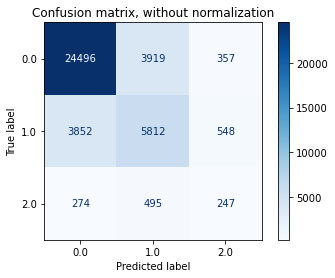

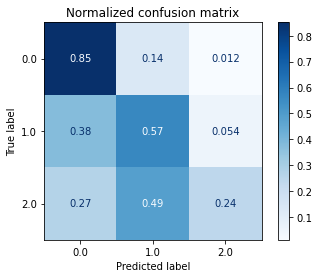

In [85]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)



In [86]:
print("Accuracy:",metrics.accuracy_score(Y_test, prediction))

Accuracy: 0.763875


In [87]:
print(classification_report(Y_test, prediction))


              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85     28772
         1.0       0.57      0.57      0.57     10212
         2.0       0.21      0.24      0.23      1016

    accuracy                           0.76     40000
   macro avg       0.55      0.55      0.55     40000
weighted avg       0.77      0.76      0.76     40000



random forest classifier 


In [88]:
RFC =RandomForestClassifier()

In [150]:
RFC.fit(X_train,Y_train.values.ravel())


RandomForestClassifier()

Confusion matrix, without normalization
[[ 7581  2862   200]
 [ 2687 25541    49]
 [  841    72   167]]
Normalized confusion matrix
[[0.71229916 0.26890914 0.01879169]
 [0.09502422 0.90324292 0.00173286]
 [0.7787037  0.06666667 0.15462963]]


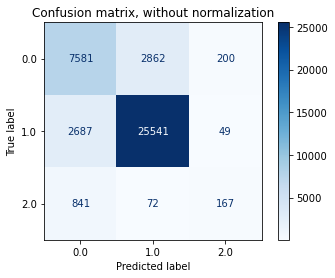

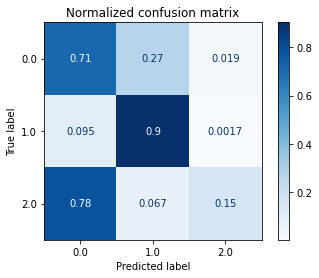

In [151]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(RFC, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [152]:
RFCprediction= RFC.predict(X_test)

In [153]:
print(confusion_matrix(Y_test, RFCprediction))

[[ 7581  2862   200]
 [ 2687 25541    49]
 [  841    72   167]]


In [212]:
print("Accuracy:",metrics.accuracy_score(Y_test, RFCprediction))


Accuracy: 0.832225


In [155]:
print(classification_report(Y_test, RFCprediction))


              precision    recall  f1-score   support

         0.0       0.68      0.71      0.70     10643
         1.0       0.90      0.90      0.90     28277
         2.0       0.40      0.15      0.22      1080

    accuracy                           0.83     40000
   macro avg       0.66      0.59      0.61     40000
weighted avg       0.83      0.83      0.83     40000



k neighrest neighbor

In [156]:
KNN = KNeighborsClassifier(n_neighbors=3)


In [157]:
KNN.fit(X_train, Y_train.values.ravel())


KNeighborsClassifier(n_neighbors=3)

In [158]:
KNNprediction= KNN.predict(X_test)

Confusion matrix, without normalization
[[ 5825  4551   267]
 [ 3678 24540    59]
 [  776   212    92]]
Normalized confusion matrix
[[0.54730809 0.427605   0.02508691]
 [0.13007038 0.86784312 0.0020865 ]
 [0.71851852 0.1962963  0.08518519]]


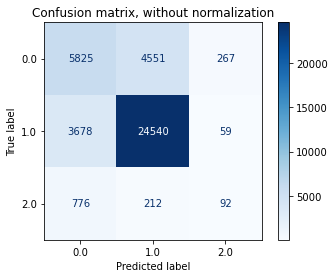

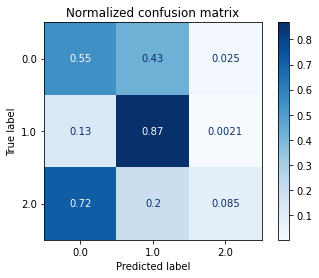

In [159]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(KNN, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [160]:
print(classification_report(Y_test, KNNprediction))


              precision    recall  f1-score   support

         0.0       0.57      0.55      0.56     10643
         1.0       0.84      0.87      0.85     28277
         2.0       0.22      0.09      0.12      1080

    accuracy                           0.76     40000
   macro avg       0.54      0.50      0.51     40000
weighted avg       0.75      0.76      0.75     40000



In [161]:
print("Accuracy:",metrics.accuracy_score(Y_test, KNNprediction))


Accuracy: 0.761425


naive bayes

In [162]:
from sklearn.naive_bayes import GaussianNB


In [163]:
NBC = GaussianNB()


In [164]:
NBC.fit(X_train,Y_train.values.ravel())


GaussianNB()

In [165]:
NBprediction= NBC.predict(X_test)


Confusion matrix, without normalization
[[ 5022  4868   753]
 [ 2030 26010   237]
 [  608    77   395]]
Normalized confusion matrix
[[0.47185944 0.45738983 0.07075073]
 [0.07178979 0.91982884 0.00838137]
 [0.56296296 0.0712963  0.36574074]]


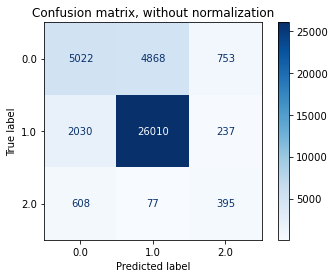

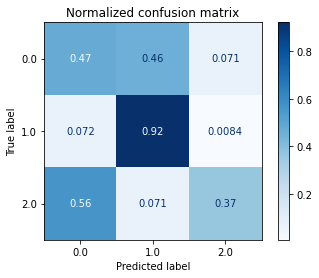

In [166]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(NBC, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [167]:
print(confusion_matrix(Y_test, NBprediction))


[[ 5022  4868   753]
 [ 2030 26010   237]
 [  608    77   395]]


In [168]:
print(classification_report(Y_test, NBprediction))

              precision    recall  f1-score   support

         0.0       0.66      0.47      0.55     10643
         1.0       0.84      0.92      0.88     28277
         2.0       0.29      0.37      0.32      1080

    accuracy                           0.79     40000
   macro avg       0.59      0.59      0.58     40000
weighted avg       0.78      0.79      0.78     40000



In [169]:
print("Accuracy:",metrics.accuracy_score(Y_test, NBprediction))

Accuracy: 0.785675
